### Purpose

The purpose of this notebook is to explore the **[Stanford Extra](https://paperswithcode.com/paper/who-left-the-dogs-out-3d-animal)** dataset.
The ultimate aim is to use it for fine-tuning a general purpose pose estimation model.

#### Import dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

#### Define paths

In [2]:
dataset_path = './dataset'
annotation_filepath = 'Annotations/StanfordExtra_v1.json'


### Explore The Dataset

In [3]:
# open the annotations file
f = open(os.path.join(dataset_path, annotation_filepath))
annotations = json.load(f)
f.close()

##### Exploring the format of the annotations

**All annotations are gathered in a list, and an annotation item is a dictionary**:
- image path
- image width
- image height
- a list of joint positions
- bounding boxes of dogs present in the image
- a boolean indicating wether there are multiple dogs in the image
- segmentation mask of dogs present in the image

In [4]:
type(annotations)

list

In [5]:
type(annotations[0])

dict

In [6]:
annotations[0].keys()

dict_keys(['img_path', 'img_width', 'img_height', 'joints', 'img_bbox', 'is_multiple_dogs', 'seg'])

#### Exploring a data item ( image + annotation )

In [52]:
nb_data_items = len(annotations)
rd_item = np.random.choice(np.arange(nb_data_items))

In [8]:
data_sample = annotations[rd_item]

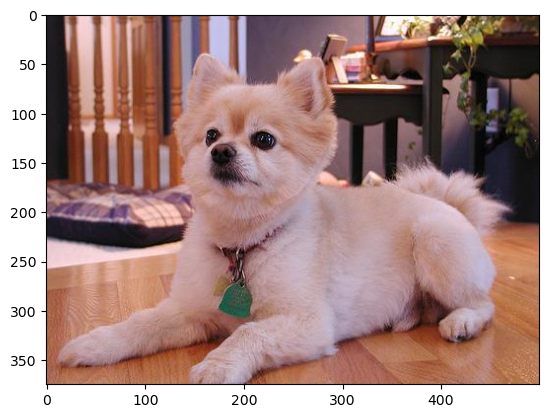

In [9]:
# load image
image_path = os.path.join(dataset_path, 'Images', data_sample['img_path'])
image = cv2.imread(image_path)[:, :, ::-1]
plt.imshow(image)

In [10]:
image.shape, image.dtype

((375, 500, 3), dtype('uint8'))

In [11]:
# remove invalid joints (a joint that has 0 as the third component should be removed because it is not "seen" in the image, 
# this is a convention proper to this dataset
joints = np.array(data_sample['joints'])
joints = joints[ joints[:, -1] == 1.0 ][:, :2]

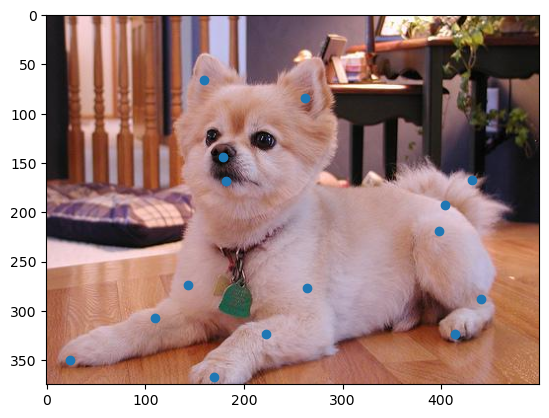

In [12]:
plt.imshow(image)
plt.scatter(joints[:, 0], joints[:, 1])

In [13]:
image.shape

(375, 500, 3)

In [37]:
# refactor in a proper function 
# the variable that stores the annotations (i.e the variable "annotations") is not passed to the function below
def explore_data(nb_samples: int) -> None:
    samples = np.random.choice(annotations, size=nb_samples, replace=False)
    fig, axes = plt.subplots(nb_samples // 3 if nb_samples % 3 == 0 else nb_samples // 3+1, 3)
    fig.set_size_inches(15, 15)    
    # for each sample
    for idx , sample in enumerate(samples):
        
        # load the image
        image_path = os.path.join(dataset_path, 'Images', sample['img_path'])
        image = cv2.imread(image_path)[:, :, ::-1] #BGR->RGB
        
        # extract the pose
        joints = np.array(sample['joints'])
        joints = joints[ joints[:, -1] == 1.0 ][:, :2]

        row = idx // 3
        column = idx % 3
        axes[row, column].imshow(image)
        axes[row, column].scatter(joints[:, 0], joints[:, 1])

    # Adjust layout to prevent overlap
    # plt.tight_layout()
    plt.show()

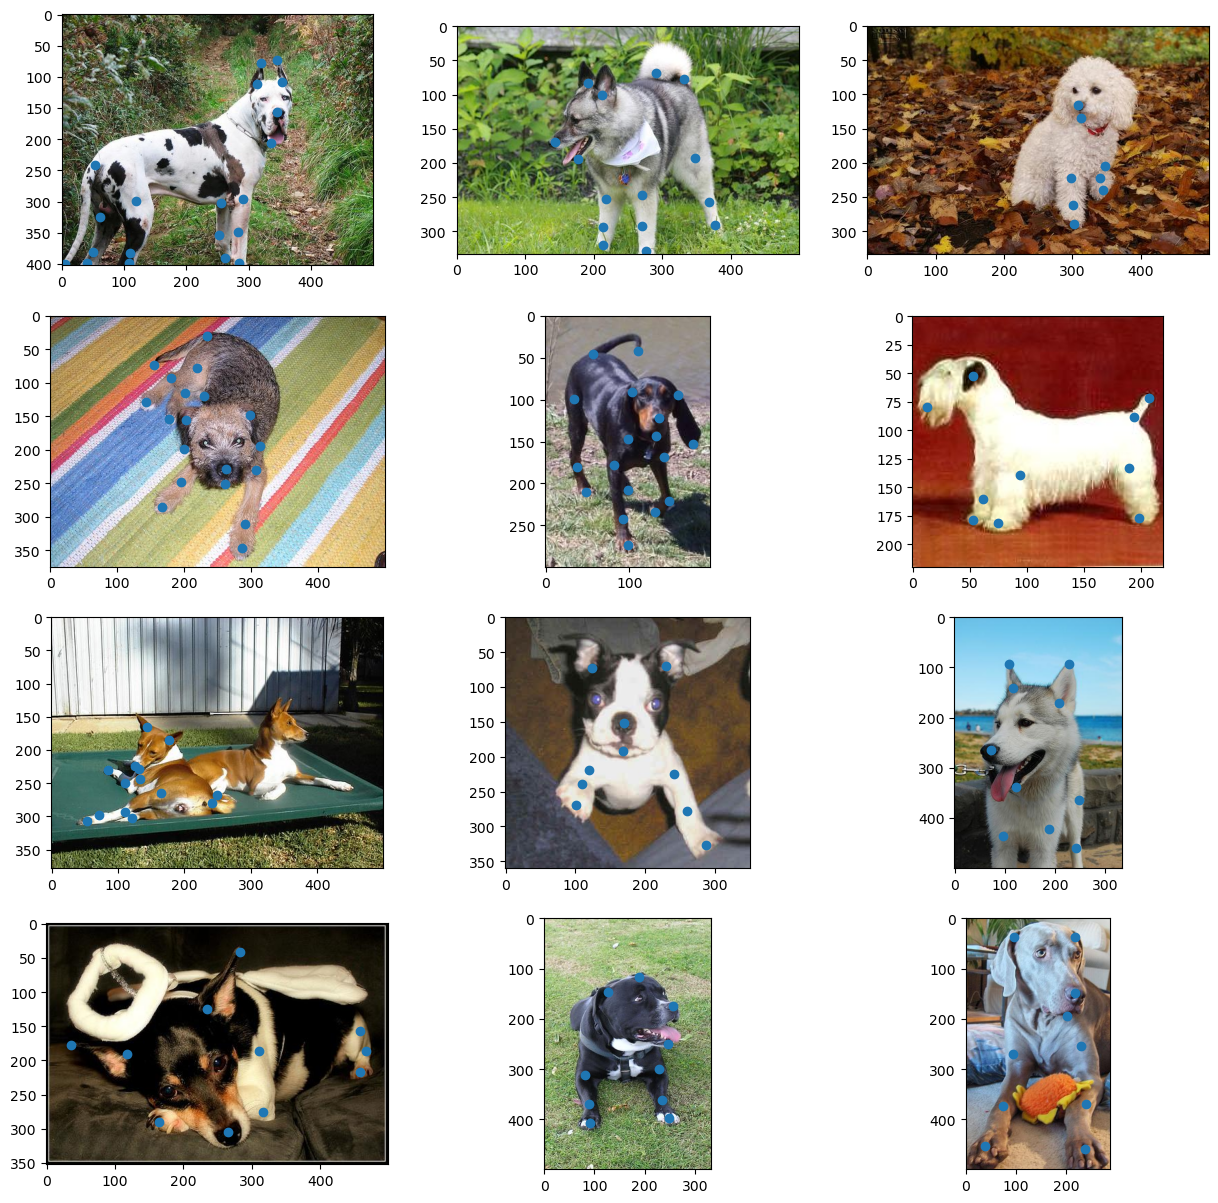

In [39]:
explore_data(12)

#### Exploring the joints of the pose

##

**The Stanford dataset had a pose of 20 keypoints**

In [55]:
# Read the keypoints definition file
df = pd.read_csv('keypoint_definitions.csv')
df

,Index,Name,Hex colour,Stanford,Animal-pose,(name in animal pose)
0,0,Left front leg: paw,d82400,y,y,L_F_Paw
1,1,Left front leg: middle joint,d82400,y,y,L_F_Knee
2,2,Left front leg: top,d82400,y,y,L_F_Elbow
3,3,Left rear leg: paw,fcfc00,y,y,L_B_Paw
4,4,Left rear leg: middle joint,fcfc00,y,y,L_B_Knee
5,5,Left rear leg: top,fcfc00,y,y,L_B_Elbow
6,6,Right front leg: paw,48b455,y,y,R_F_Paw
7,7,Right front leg: middle joint,48b455,y,y,R_F_Knee
8,8,Right front leg: top,48b455,y,y,R_F_Elbow
9,9,Right rear leg: paw,0090aa,y,y,R_B_Paw


In [54]:
df_stanford = df[df['Stanford'] == 'y']
df_stanford['Name']

0               Left front leg: paw
1      Left front leg: middle joint
2               Left front leg: top
3                Left rear leg: paw
4       Left rear leg: middle joint
5                Left rear leg: top
6              Right front leg: paw
7     Right front leg: middle joint
8              Right front leg: top
9               Right rear leg: paw
10     Right rear leg: middle joint
11              Right rear leg: top
12                       Tail start
13                         Tail end
14                 Base of left ear
15                Base of right ear
16                             Nose
17                             Chin
18                     Left ear tip
19                    Right ear tip
Name: Name, dtype: object